# 1. Overview

O conjunto de dados disponibilizado se refere ao panorama imobiliário de algumas cidades brasileiras. O nosso objetivo é entender o conjunto de dados e promover análises profundas a fim de gerar insights sobre a situação imobiliária das cidades e o comportamento de algumas features. 

O conjunto de dados possui 13 variáveis:
- City: cidade do imóvel. 
- Area: área do imóvel.
- Rooms: quantidade de quartos no imóvel.
- Bathroom: quantidade de banheiros no imóvel.
- Parking spaces: quantidade de vagas que morador possui.
- Floor: andar do apartamento.
- Animal: se o imóvel permite ou não animais domésticos.
- Furniture: se o móvel já vem mobiliado ou nçai,
- Hoa: valor do condomínio em reais.
- Property tax: imposto sobre propriedade (ex.: IPTU) em reais.
- Rent amount: valor do aluguel em reais.
- Fire insurance: valor do seguro contra incêndios em reais.
- Total: valor total a ser gasto mensalmente pelo morador.

# 2. Importando biblotecas necessárias

O primeiro passo para realizar uma Análise Exploratória dos Dados é realizar a importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Carregando e entendendo os dados

O segundo passo é importar os dados e entender as variáveis (qual o seu tipo). 

In [2]:
df = pd.read_csv('C:/Users/cirom/OneDrive/Área de Trabalho/PESSOAL/Cursos/FCCD/houses_to_rent_v2.csv')

In [3]:
df.head()

city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841  
3                   17        1421  
4                   11         836

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## 3.1. Criando colunas e corrigindo campos

Em tese, todas as variáveis estão com o tipo atribuído mais adequado. Porém, para trabalhar com as variáveis 'Animal' e 'Furniture', eu prefiro transformá-las em booleanos logo de cara (não excluindo a variável de origem), uma vez que, em termos de código, talvez seja mais fácil trabalhar no futuro.

In [5]:
df.groupby(['animal']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

animal  counts
0      acept    8316
1  not acept    2376

In [6]:
df.groupby(['furniture']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

furniture  counts
1  not furnished    8086
0      furnished    2606

In [7]:
df['animal_bool'] = np.where(df['animal']=="acept", 1, 0).astype(bool)
df['furniture_bool'] = np.where(df['furniture']=="furnished", 1, 0).astype(bool)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
 13  animal_bool          10692 non-null  bool  
 14  furniture_bool       10692 non-null  bool  
dtypes: bool(2), int64(9), object(4)
memory usage: 1.1+ MB

Observando os tipos das variáveis, existe algo estranho de identificação da variável 'Floor'. Em tese, ela deveria ser um número inteiro, mas aparece como objeto. Logo, devemos analisar os valores que existem para ela.

In [9]:
df.groupby(['floor']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

floor  counts
0      -    2461
1      1    1081
12     2     985
23     3     931
27     4     748
29     5     600
31     6     539
32     7     497
33     8     490
34     9     369
2     10     357
3     11     303
4     12     257
5     13     200
6     14     170
7     15     147
8     16     109
9     17      96
10    18      75
11    19      53
13    20      44
14    21      42
16    23      25
18    25      25
15    22      24
19    26      20
17    24      19
20    27       8
21    28       6
22    29       5
25    32       2
26    35       1
28    46       1
30    51       1
24   301       1

Vemos algumas questões a serem tratadas a partir desta variável:

- Existem observações '-'. Provavelmente, ao indicar ausência de andar, estamos lidando com casas. Logo, transformar estas observações em '0' e, em sequência, criar uma variável booleana indicando se o imóvel é casa ou apartamento pode indicar análises interessantes. Neste caso, a variável 'Apartment' assume valor 0 (False) quando for casa e valor 1 (True) quando for apartamento. A descrição está na variável 'Type'.
- Existe um imóvel com 301 andares registrado no Brasil. Usando conhecimentos gerais, sabemos que o prédio mais alto do mundo (Burj Khalifa) possui 163 andares. Logo, esta observação claramente pode ser um erro de digitação. Porém, antes de excluí-la seria interessante o comportamento das demais variáveis.
- O prédio mais alto do Brasil possui 77 andares. Logo, as observações com 51, 46, 35 etc andares consideraremos como plausíveis. 

In [10]:
df["floor"] = df["floor"].replace('-', '0')

In [11]:
df["floor"] = df["floor"].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int32 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
 13  animal_bool          10692 non-null  bool  
 14  furniture_bool       10692 non-null  bool  
dtypes: bool(2), int32(1), int64(9), object(3)
memory usag

In [13]:
df['apartment'] = np.where(df['floor']== 0, 0, 1).astype(bool)
df['type'] = np.where(df['floor']== 0, "House", "Apartment").astype(str)

In [14]:
df.loc[df['floor']==301]

city  area  rooms  bathroom  parking spaces  floor animal  \
2562  Belo Horizonte    80      3         2               2    301  acept   

          furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
2562  not furnished       750              2600                164   

      fire insurance (R$)  total (R$)  animal_bool  furniture_bool  apartment  \
2562                   35        3549         True           False       True   

           type  
2562  Apartment

Um prédio em Belo Horizonte com 301 andares é irrealista. Em um prédio deste tamanho, além disso, esperaríamos uma taxa de condomínio bem maior (não 750,00), em função dos altos custos de manter a operação de uma edificação deste tamanho. Logo, irei excluir esta observável, pois é um erro de registro.

In [15]:
df = df.loc[df["floor"] != 301]

In [16]:
df.head()

city  area  rooms  bathroom  parking spaces  floor     animal  \
0     São Paulo    70      2         1               1      7      acept   
1     São Paulo   320      4         4               0     20      acept   
2  Porto Alegre    80      1         1               1      6      acept   
3  Porto Alegre    51      2         1               0      2      acept   
4     São Paulo    25      1         1               0      1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  animal_bool  furniture_bool  apartment  \
0                   42        5618         True            True       True   
1                   63        7973         True           False       True   
2                   41        3841         True           False       True   
3                   17        1421         True           False       True   
4                   11         836        False           False       True   

        type  
0  Apartment  
1  Apartment  
2  Apartment  
3  Apartment  
4  Apartment

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10691 entries, 0 to 10691
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10691 non-null  object
 1   area                 10691 non-null  int64 
 2   rooms                10691 non-null  int64 
 3   bathroom             10691 non-null  int64 
 4   parking spaces       10691 non-null  int64 
 5   floor                10691 non-null  int32 
 6   animal               10691 non-null  object
 7   furniture            10691 non-null  object
 8   hoa (R$)             10691 non-null  int64 
 9   rent amount (R$)     10691 non-null  int64 
 10  property tax (R$)    10691 non-null  int64 
 11  fire insurance (R$)  10691 non-null  int64 
 12  total (R$)           10691 non-null  int64 
 13  animal_bool          10691 non-null  bool  
 14  furniture_bool       10691 non-null  bool  
 15  apartment            10691 non-null  bool  
 16  type     

## 3.2. Verificando valores nulos e duplicatas

Parte também importante em uma análise exploratória de dados é verificar a existência de valores nulos ou registros duplicados no dataframe.

In [18]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
animal_bool            0
furniture_bool         0
apartment              0
type                   0
dtype: int64

In [19]:
df.duplicated().sum()

358

Não temos valores nulos nas colunas. Por outro lado, temos 358 registros duplicados. A questão é: excluímos ou não? Como na base de dados, não temos um ID de domícilio, isto é, um campo que gera unicidade, não conseguimos afirmar que são domícilios repetidos na base. Podem ser simplesmente domícilios distintos com as mesmas características. Desta forma, a priori, não irie excluir registros duplicados.

## 4. Entendimento das demais variáveis

Analisamos as variável 'Animal', 'Furniture', 'Floor'. A verificação da distribuição das variáveis numéricas e a contagem das cidades na variavel 'City' se faz necessário para dar um entendimento inicial da base.

### 4.1. Cidade

Vemos que não existem problemas no que diz respeito ao nome das cidades na nossa base.

In [20]:
df.groupby(['city']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

city  counts
4       São Paulo    5887
3  Rio de Janeiro    1501
0  Belo Horizonte    1257
2    Porto Alegre    1193
1        Campinas     853

### 4.2. Área

Vemos, pelo boxplot, a existência de potenciais outliers, o que é confirmado pelas estatísticas descritivas da coluna. A média é de 149,22 m². Porém, a média é muito afetada por outliers. Em comparação, a mediana é de 90 m³. Além disso, 75% das observações possuem área abaixo de 182 m², indicando valores muito elevados para a área em alguns domicílios.

In [21]:
df['area'].describe()

count    10691.000000
mean       149.224394
std        537.041642
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

[Text(0.5, 1.0, 'Distribuição Variável Área do Imóvel (m²)')]

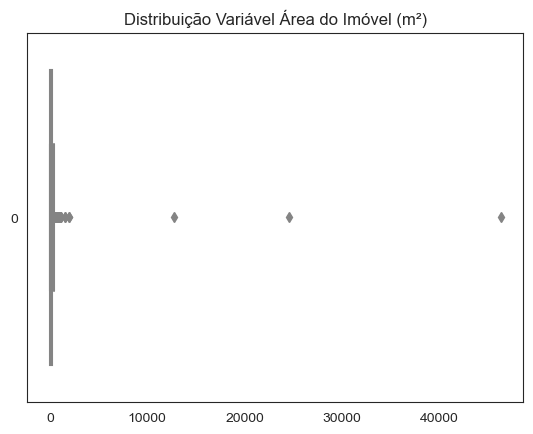

In [22]:
sns.set_style("white")
sns.boxplot(df['area'], orient="h", color="peachpuff").set(title ='Distribuição Variável Área do Imóvel (m²)')

In [23]:
df.loc[df['area']>10000]

city   area  rooms  bathroom  parking spaces  floor animal  \
2397  Belo Horizonte  46335      4         8               5     11  acept   
5915       São Paulo  24606      5         4               4     12  acept   
9241        Campinas  12732      3         2               0      3  acept   

          furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
2397      furnished       960              8500                646   
5915  not furnished      2254              8100               7859   
9241  not furnished       700              1600                 96   

      fire insurance (R$)  total (R$)  animal_bool  furniture_bool  apartment  \
2397                  114       10220         True            True       True   
5915                  103       18320         True           False       True   
9241                   21        2417         True           False       True   

           type  
2397  Apartment  
5915  Apartment  
9241  Apartment

Temos três imóveis com área acima de 10000 m. Todos eles são apartamentos. Todavia, em uma rápida pesquisa no Google, descobriu-se que a maior cobertura do país, localizada na Zona Sul do Rio de Janeiro, possui 3900 m². A única justificativa para esses valores de áreas é somente se fossem sítios, chales, pequenas propriedades agrícolas. Não irei excluir essas observações, a priori, apesar de se encaixarem na mesma questão da quantidade de andares vista no tópico 3.1. Todavia, ao se analisar a correlação desta variável com as demais, um tratamento deverá ser feito, além de também podermos medir o impactos desses outliers nas análises.

Para fins de confirmação destes outliers, vamos utilizar a técnica do Intervalo Interquantil para entender as faixas a partir das quais podemos considerar uma observação como um outlier. Como não existem valores negativos de área, o limite inferior ser -133 é irreal. Todavia, o limite superior ser 371 é plausível. Vamos ver quantas observações seriam outliers de acordo com estes critério em seguida. Novamente, não iremos excluir os valores. A intenção é entender e posicionar os valores de área acima de 10000 claramente como outliers, até porque imóveis com área acima de 371 são comuns em grandes cidades. Vemos que o primeiro valor antes de 12732 é 2000. Isto é, há uma confirmação extra do caráter excepcional dos valores de área acima de 10000.

In [24]:
Q3 = np.quantile(df['area'], 0.75)
Q1 = np.quantile(df['area'], 0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

Limites = [lower_range, upper_range]

print(Limites)

[-133.0, 371.0]


In [25]:
df.loc[df['area']>371].sort_values(['area'], ascending=False)

city   area  rooms  bathroom  parking spaces  floor animal  \
2397  Belo Horizonte  46335      4         8               5     11  acept   
5915       São Paulo  24606      5         4               4     12  acept   
9241        Campinas  12732      3         2               0      3  acept   
5129  Belo Horizonte   2000      4         2               3      0  acept   
8790  Belo Horizonte   2000      3         3               2      2  acept   
...              ...    ...    ...       ...             ...    ...    ...   
5255  Belo Horizonte    373      4         5               7      0  acept   
9015    Porto Alegre    373      4         4               4      0  acept   
2299       São Paulo    373      4         4               3     12  acept   
4505  Belo Horizonte    372      3         4               3      0  acept   
3674       São Paulo    372      5         4               6      0  acept   

          furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
2397      furnished       960              8500                646   
5915  not furnished      2254              8100               7859   
9241  not furnished       700              1600                 96   
5129  not furnished         0              4956                200   
8790      furnished      3000              5000                200   
...             ...       ...               ...                ...   
5255  not furnished         0             11500                522   
9015      furnished       350              6800                100   
2299  not furnished      4500             12750               1417   
4505  not furnished         0              5500                343   
3674  not furnished         0              9200               1041   

      fire insurance (R$)  total (R$)  animal_bool  furniture_bool  apartment  \
2397                  114       10220         True            True       True   
5915                  103       18320         True           False       True   
9241                   21        2417         True           False       True   
5129                   82        5238         True           False      False   
8790                   67        8267         True            True       True   
...                   ...         ...          ...             ...        ...   
5255                  189       12210         True           False      False   
9015                  121        7371         True            True      False   
2299                  162       18830         True           False       True   
4505                   91        5934         True           False      False   
3674                  139       10380         True           False      False   

           type  
2397  Apartment  
5915  Apartment  
9241  Apartment  
5129      House  
8790  Apartment  
...         ...  
5255      House  
9015      House  
2299  Apartment  
4505      House  
3674      House  

[672 rows x 17 columns]

## 4.3. Rooms

A variável apresenta um comportamento normal. 75% dos imóveis possuem até 3 cômodos. Os imóveis com 4 ou mais cômodos são, em sua maioria, casas, o que é esperado. Basta ver o boxplot para a categoria 'House'. Por este boxplot, também vemos indícios que imóveis com um cômodo são mais predominantes na categoria de apartamento. Um teste de hipóteses seria uma ferramenta fundamental para confirmar estes indícios (o que faremos em análises posteriores).

In [26]:
df['rooms'].describe()

count    10691.000000
mean         2.506033
std          1.171311
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: rooms, dtype: float64

[Text(0.5, 1.0, 'Distribuição Variável Quantidade de Quartos')]

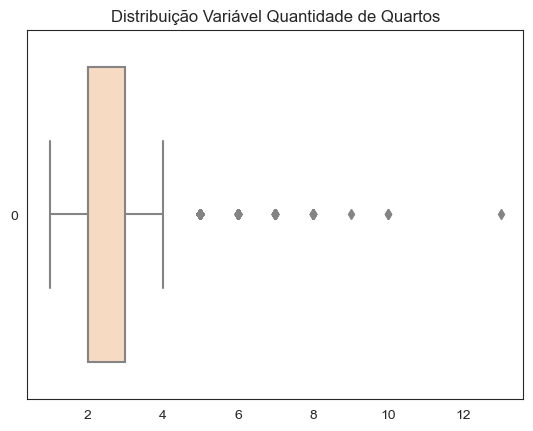

In [27]:
sns.boxplot(df['rooms'], orient="h", color="peachpuff").set(title ='Distribuição Variável Quantidade de Quartos')

In [28]:
my_palette = ['royalblue', 'peachpuff']

[Text(0.5, 0, 'Tipo de Imóvel'),
 Text(0, 0.5, 'Quartos'),
 Text(0.5, 1.0, 'Quantidade de Quartos por Tipo de Imóvel')]

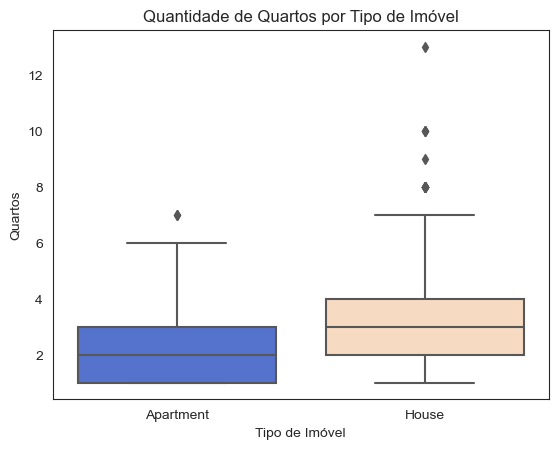

In [29]:
sns.boxplot(x="type", y="rooms", data=df, palette=my_palette).set(xlabel = "Tipo de Imóvel", ylabel = "Quartos", title ='Quantidade de Quartos por Tipo de Imóvel')

## 4.4. Bathroom

A variável apresenta um comportamento normal. Até 75% dos imóveis possuem até 3 banheiros (de uma amostra de 10691 imóveis).

In [30]:
df['bathroom'].describe()

count    10691.000000
mean         2.236835
std          1.407262
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathroom, dtype: float64

[Text(0.5, 1.0, 'Distribuição Variável Quantidade de Banheiros')]

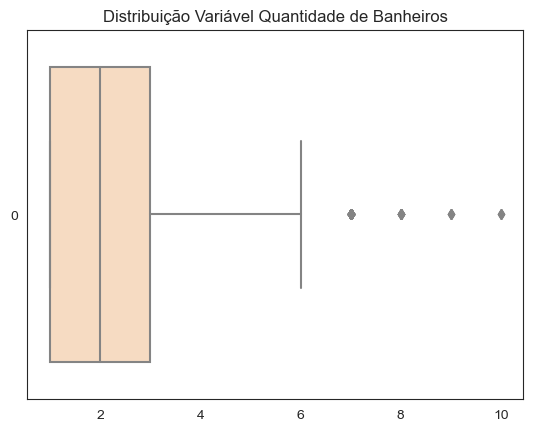

In [31]:
sns.boxplot(df['bathroom'], orient="h", color="peachpuff").set(title ='Distribuição Variável Quantidade de Banheiros')

## 4.5. Parking Spaces

A variável apresenta um comportamento normal. Até 75% dos imóveis possuem até 2 vagas de garagem.

In [32]:
df.rename(columns={"parking spaces": "parking_space"}, inplace=True)

In [33]:
df['parking_space'].describe()

count    10691.000000
mean         1.609110
std          1.589591
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: parking_space, dtype: float64

[Text(0.5, 1.0, 'Distribuição Variável Quantidade de Vagas de Estacionamento')]

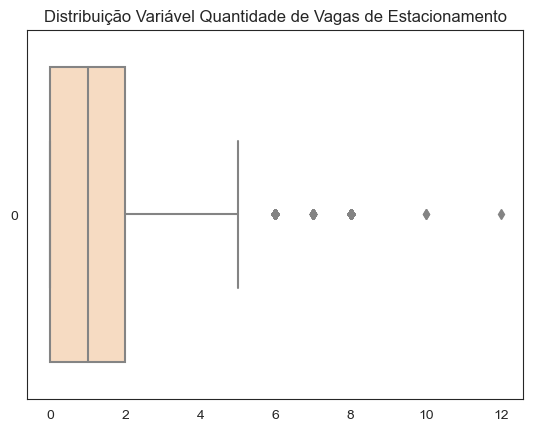

In [34]:
sns.boxplot(df['parking_space'], orient="h", color="peachpuff").set(title ='Distribuição Variável Quantidade de Vagas de Estacionamento')

## 4.6. Floor

Já tínhamos visto anteriormente a existência de potenciais outliers para esta variável, o que é reverberado pelo Boxplot e pelo fato de a média (5 andares) ser superior à mediana (3 andares). Vamos aplicar a técnica do Intervalo Interquantil para entender as faixas a partir das quais podemos considerar uma observação como um outlier.

Vemos que o limite superior é de 18,5 andares. Existem muitos prédios com quantidades de andares destoantes da média. Todavia, isso não significa que devemos excluir as observação, pois podem ser exceções de construções em grandes centros. Temos que ver, na verdade, é se as informações para demais variáveis são condizentes para estes casos: por exemplo, prédios com mais andares admitiriam alíquotas maiores de imposto sobre propriedade (property tax).

In [35]:
df['floor'].describe()

count    10691.000000
mean         5.040314
std          5.351985
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         51.000000
Name: floor, dtype: float64

[Text(0.5, 1.0, 'Distribuição Variável Quantidade de Andares do Prédio')]

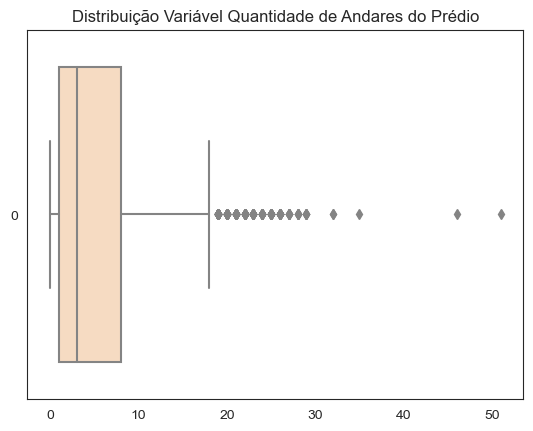

In [36]:
sns.boxplot(df['floor'], orient="h", color="peachpuff").set(title ='Distribuição Variável Quantidade de Andares do Prédio')

In [37]:
Q3_floor = np.quantile(df['floor'], 0.75)
Q1_floor = np.quantile(df['floor'], 0.25)
IQR_floor = Q3_floor - Q1_floor

lower_range_floor = Q1_floor - 1.5 * IQR_floor
upper_range_floor = Q3_floor + 1.5 * IQR_floor

Limites_floor = [lower_range_floor, upper_range_floor]

print(Limites_floor)

[-9.5, 18.5]


## 4.7. HOA

Da forma forma que observamos em 'Floor', vemos que a distribuição da variável Hoa (valor do condomínio em reais) é afetada pela existência de potenciais outliers. Vemos que 75% dos valores são menores ou iguais a 1.238,00. Porém, vemos que existem valores altíssimos, tal qual 1.117.000,00. Esta "pré-analise" já nos deixa atentos para quando formos realmente analisar a relação entre outras variáveis e o valor do condomínio, já que um condomínio de mais de um milhão de reais parece irrealista (talvez não seja, é uma hipótese).

In [38]:
df.rename(columns={"hoa (R$)": "hoa"}, inplace=True)
df.rename(columns={"total (R$)": "total"}, inplace=True)
df.rename(columns={"rent amount (R$)": "rent_amount"}, inplace=True)

In [39]:
df['hoa'].describe().apply("{0:.2f}".format)

count      10691.00
mean        1174.06
std        15593.03
min            0.00
25%          170.00
50%          560.00
75%         1238.00
max      1117000.00
Name: hoa, dtype: object

[Text(0.5, 1.0, 'Distribuição Variável Valor Condomínio')]

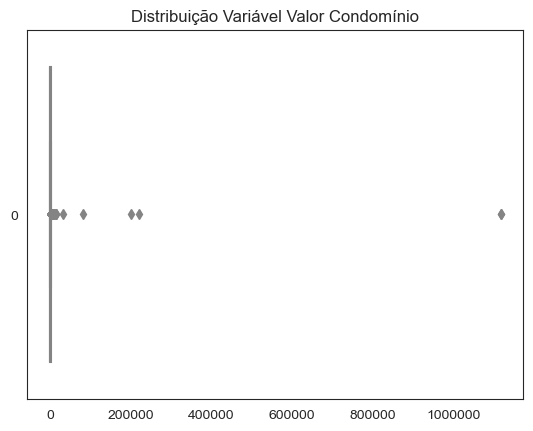

In [40]:
plt = sns.boxplot(df['hoa'], orient="h", color="peachpuff")
plt.ticklabel_format(style='plain', axis='x')
plt.set(title ='Distribuição Variável Valor Condomínio')

As duas primeiras informações já ilustram a linha de análise para verificar possíveis outliers. Temos imóveis com taxa de condomínio de 1.117.000,00, mas que tem aluguel de 2790,00 e IPTU de 64,00. A mediana da participação da taxa de condomínio no custo total é 18,71%. Se pegamos os imóveis com condomínio acima de 30000,00, temos que a média desta participação é de 94,40%. Nestes imóveis se gasta em média com aluguel 7130,00, sendo que o aluguel é o custo que mais pesa no custo final.

In [41]:
df['part_condom'] = df['hoa']/df['total']
df['part_condom'].describe()

count    10691.000000
mean         0.180035
std          0.130017
min          0.000000
25%          0.080128
50%          0.187166
75%          0.265269
max          0.997321
Name: part_condom, dtype: float64

In [42]:
df_condo = df.loc[df['hoa']>30000]

In [43]:
df_condo['part_condom'].describe()

count    6.000000
mean     0.944066
std      0.059574
min      0.848761
25%      0.911221
50%      0.960248
75%      0.992266
max      0.997321
Name: part_condom, dtype: float64

In [44]:
df_condo['rent_amount'].describe()

count        6.00000
mean      7130.00000
std       7420.06469
min        700.00000
25%       2790.00000
50%       3645.00000
75%      10125.00000
max      20000.00000
Name: rent_amount, dtype: float64

In [45]:
df.sort_values(by=['hoa'], ascending=False).head(20)

city  area  rooms  bathroom  parking_space  floor     animal  \
255    Belo Horizonte   155      1         4              0      4  not acept   
6979   Belo Horizonte   155      1         4              0      4  not acept   
6230        São Paulo   340      5         4              2      7      acept   
2859        São Paulo   285      4         5              4      6      acept   
2928   Rio de Janeiro    35      1         1              0      1      acept   
1444     Porto Alegre    42      1         1              0     10      acept   
1213        São Paulo   850      6         7              4      0  not acept   
415         São Paulo   488      4         3              3      0      acept   
5293        São Paulo   850      5         7              8      1  not acept   
8858        São Paulo   800      4         7              8      0  not acept   
974         São Paulo   600      6         7              4      0      acept   
547         São Paulo   580      5         5              4      4      acept   
7020        São Paulo   224      4         5              3     12      acept   
7679        São Paulo   884      5         7              6      8      acept   
1862        São Paulo   560      4         4              7      2      acept   
6185        São Paulo   455      4         5              4      5      acept   
1072        São Paulo   390      4         4              5      8  not acept   
10184       São Paulo  1000      4         5              7      5      acept   
254         São Paulo   530      5         6              4      2      acept   
722         São Paulo   620      4         6              4      1      acept   

           furniture      hoa  rent_amount  property tax (R$)  \
255    not furnished  1117000         2790                 64   
6979   not furnished  1117000         2790                 64   
6230   not furnished   220000        12000               1000   
2859       furnished   200000        20000               1834   
2928       furnished    81150         4500               9900   
1444   not furnished    32000          700                 40   
1213   not furnished    15000        13000               2465   
415    not furnished    14130         6400               1214   
5293   not furnished    14000         4000                  0   
8858   not furnished    10000         8500                209   
974        furnished    10000        15000                 84   
547    not furnished     9900        15000               2200   
7020   not furnished     9500         9500               1650   
7679   not furnished     9000        12750               5917   
1862   not furnished     8600        15000               5000   
6185   not furnished     8500        19500               3334   
1072       furnished     8500         8600               3917   
10184  not furnished     8362         6800               4170   
254        furnished     8300        15000               5000   
722    not furnished     8133        15000               4520   

       fire insurance (R$)    total  animal_bool  furniture_bool  apartment  \
255                     38  1120000        False           False       True   
6979                    38  1120000        False           False       True   
6230                   153   233200         True           False       True   
2859                   254   222100         True            True       True   
2928                    58    95610         True            True       True   
1444                    11    32750         True           False       True   
1213                   196    30660        False           False      False   
415                     82    21820         True           False      False   
5293                    51    18050        False           False       True   
8858                   128    18840        False           False      False   
974                    226    25310         True            True      False   
5

É interessante, para o caso da taxa de condomínio, comparar seu valor entre as cidades. Isto é, qual a relação entre condomínio e localização. Porém, para isso, de fato teremos que excluir potenciais outliers. Para isso utilizaremos a técnica do Intervalo Interquantil para tratar essas informações

In [46]:
Q3_condo = np.quantile(df['hoa'], 0.75)
Q1_condo = np.quantile(df['hoa'], 0.25)
IQR_condo = Q3_condo - Q1_condo

lower_range_condo = Q1_condo - 1.5 * IQR_condo
upper_range_condo = Q3_condo + 1.5 * IQR_condo

Limites_condo = [lower_range_condo, upper_range_condo]

print(Limites_condo)

[-1432.0, 2840.0]


In [47]:
df_condo_2 = df.loc[df['hoa']<2840]

Vemos que as médias variam entre as cidades. O valor médio do condomínio no Rio de Janeiro, na base após a limpeza de outliers, é de 910,52, contra, por exemplo, 438,54 de Porto Alegre e 495,49 de Belo Horizonte. É uma diferença na faixa de 400,00 reais, o que é muito.

Avaliando o boxplot, vemos que, de fato, as medianas também variam muito entre as cidades. Todavia, a dispersão dos valores é alta para as 5 cidades. A cidade com menor dispersão é Porto Alegre (diferença entre Q3 e Q1, que são, respectivamente, as linhas superior e inferior do boxplot, é menor). Por outro lado, vemos que os valores para o Rio de Janeiro estão concentrados em uma faixa acima de 500,00 reais. Só para fins de comparação, o 1 quartil para o Rio de Janeiro é 482,00, enquanto o 3 quartil para Porto Alegre é 525,00. Ou seja, o fator localização afeta a distribuição dos valores de condomínio.

In [48]:
df_condo_2.groupby(['city'])['hoa'].mean().sort_values(ascending=True)

city
Porto Alegre      438.541843
Belo Horizonte    495.491896
Campinas          575.609524
São Paulo         755.770557
Rio de Janeiro    910.523975
Name: hoa, dtype: float64

Média: city
Belo Horizonte    495.491896
Campinas          575.609524
Porto Alegre      438.541843
Rio de Janeiro    910.523975
São Paulo         755.770557
Name: hoa, dtype: float64
Mediana: city
Belo Horizonte    285.5
Campinas          480.0
Porto Alegre      350.0
Rio de Janeiro    754.0
São Paulo         565.0
Name: hoa, dtype: float64
Máximo: city
Belo Horizonte    2800
Campinas          2800
Porto Alegre      2700
Rio de Janeiro    2800
São Paulo         2835
Name: hoa, dtype: int64
75º percentil/Q3: city
Belo Horizonte     700.0
Campinas           750.0
Porto Alegre       525.0
Rio de Janeiro    1262.0
São Paulo         1200.0
Name: hoa, dtype: float64
25º percentil/Q1: city
Belo Horizonte      0.0
Campinas          280.0
Porto Alegre      207.0
Rio de Janeiro    482.0
São Paulo           0.0
Name: hoa, dtype: float64


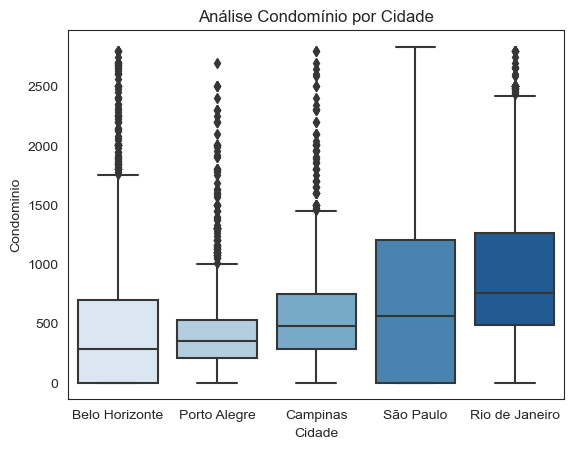

In [49]:
median_hoa_city = df.groupby(['city'])['hoa'].median().sort_values(ascending=True)

img_hoa = sns.boxplot(x=df_condo_2["city"], y=df_condo_2["hoa"], palette="Blues", order=median_hoa_city.index)
img_hoa.set(xlabel = "Cidade", ylabel = "Condominio",title ='Análise Condomínio por Cidade')
print("Média:", df_condo_2.groupby("city")["hoa"].mean())
print("Mediana:", df_condo_2.groupby("city")["hoa"].median())
print("Máximo:", df_condo_2.groupby("city")["hoa"].max())
print("75º percentil/Q3:", df_condo_2.groupby("city")["hoa"].quantile(.75))
print("25º percentil/Q1:", df_condo_2.groupby("city")["hoa"].quantile(.25))

## 4.8. Rent Amount

Diferentemente da variável de valor do condomínio, o valor do aluguel parece se comportar de forma mais realista, com o maior valor pago sendo de 45.000,00.

In [50]:
df['rent_amount'].describe().apply("{0:.2f}".format)

count    10691.00
mean      3896.37
std       3408.68
min        450.00
25%       1530.00
50%       2662.00
75%       5000.00
max      45000.00
Name: rent_amount, dtype: object

[Text(0.5, 1.0, 'Distribuição Variável Valor Aluguel')]

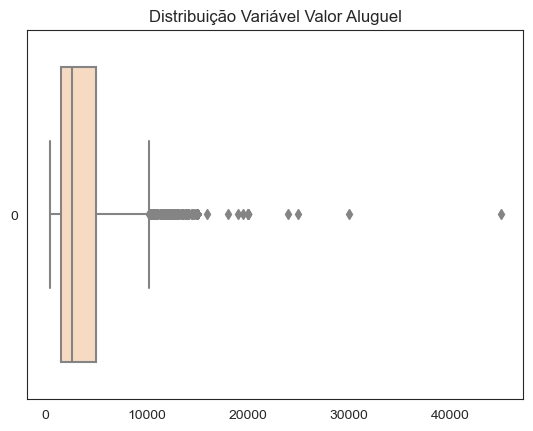

In [51]:
plt2 = sns.boxplot(df['rent_amount'], orient="h", color="peachpuff")
plt2.ticklabel_format(style='plain', axis='x')
plt2.set(title ='Distribuição Variável Valor Aluguel')

## 4.9. Property Tax

Pela distribuição dos valores, vemos que 75% são menores ou iguais a 375,00. Nesta amostra, um valor de imposto de 313.700,00 parece irreal. Teríamos que cruzar esta informação com as informações de característica do imóvel, valor do aluguel, valor do condomínio etc para ver se é de fato um valor real ou um outlier que pode ser excluído (se encaixaria em um erro de registro, por exemplo).

In [52]:
df.rename(columns={"property tax (R$)": "property_tax"}, inplace=True)

In [53]:
df['property_tax'].describe().apply("{0:.2f}".format)

count     10691.00
mean        366.72
std        3107.98
min           0.00
25%          38.00
50%         125.00
75%         375.00
max      313700.00
Name: property_tax, dtype: object

[Text(0.5, 1.0, 'Distribuição Variável Valor Imposto sobre Propriedade')]

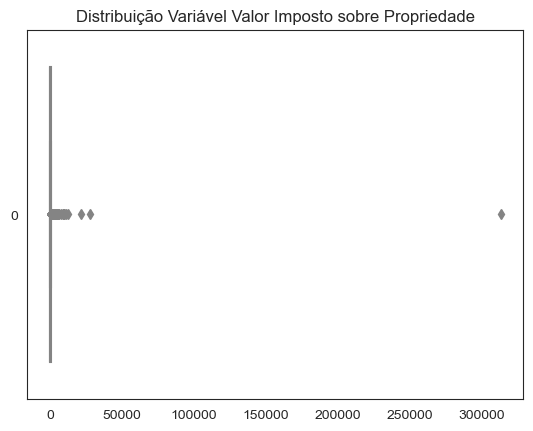

In [54]:
plt3 = sns.boxplot(df['property_tax'], orient="h", color="peachpuff")
plt3.ticklabel_format(style='plain', axis='x')
plt3.set(title ='Distribuição Variável Valor Imposto sobre Propriedade')

Pelo retorno abaixo vemos que o valor de 313.700,00 claramente é um outlier. Os valores de IPTU acima de 20000,00 também são discrepantes. Porém, um dos imóveis é um casa de 700 m² em São Paulo com valor de aluguel de 10000,00

In [55]:
df.sort_values(by=['property_tax'], ascending=False).head(15)

city   area  rooms  bathroom  parking_space  floor  \
6645        São Paulo     42      1         2              1      6   
6243   Rio de Janeiro     95      2         2              1     11   
1699        São Paulo    700      4         4              4      0   
10172  Belo Horizonte    260      4         4              6     10   
5331        São Paulo    300      4         5              5      6   
2928   Rio de Janeiro     35      1         1              0      1   
7674        São Paulo    890      5         6              8      0   
19          São Paulo    600      4         5              6      0   
2182        São Paulo    700      4         7              8      0   
8187        São Paulo    700      4        10              0      0   
5915        São Paulo  24606      5         4              4     12   
7679        São Paulo    884      5         7              6      8   
9765        São Paulo    850      4         4              8      0   
421         São Paulo    900      4         9              8      1   
3494        São Paulo    500      5         7              7      0   

          animal      furniture    hoa  rent_amount  property_tax  \
6645   not acept  not furnished    690         2500        313700   
6243       acept  not furnished   1024         3000         28120   
1699       acept  not furnished      0        10000         21880   
10172      acept      furnished   3200        11900         12500   
5331   not acept  not furnished   3500         1990         10830   
2928       acept      furnished  81150         4500          9900   
7674   not acept  not furnished      0        11000          9500   
19         acept  not furnished      0        12000          9500   
2182       acept  not furnished      0        45000          8750   
8187       acept  not furnished      0        15000          8750   
5915       acept  not furnished   2254         8100          7859   
7679       acept  not furnished   9000        12750          5917   
9765       acept  not furnished      0        12000          5834   
421        acept  not furnished      0        15000          5700   
3494       acept  not furnished      0        11500          5500   

       fire insurance (R$)   total  animal_bool  furniture_bool  apartment  \
6645                    32  316900        False           False       True   
6243                    39   32180         True           False       True   
1699                   151   32040         True           False      False   
10172                  159   27760         True            True       True   
5331                    26   16350        False           False       True   
2928                    58   95610         True            True       True   
7674                   166   20670        False           False      False   
19                     181   21680         True           False      False   
2182                   677   54430         True           False      False   
8187                   226   23980         True           False      False   
5915                   103   18320         True           False       True   
7679                   162   27830         True           False       True   
9765                   181   18020         True           False      False   
421                    226   20930         True           False       True   
3494                   173   17170         True           False      False   

            type  part_condom  
6645   Apartment     0.002177  
6243   Apartment     0.031821  
1699       House     0.000000  
10172  Apartment     0.115274  
5331   Apartment     0.214067  
2928   Apartment     0.848761  
7674       House     0.000000  
19         House     0.000000  
2182       House     0.000000  
8187       House     0.000000  
5915   Apartment     0.123035  
7679   Apartment     0.323392  
9765       House     0.000000  
421    Apartment     0.000000  
3494       House     0.000000

Nos três casos de IPTU acima de 20000,00, os valores do imposto representam 99%, 87,38%, e 68,29% (do maior valor do imposto até o terceiro maior). A média da amostra é de 4,9%, a mediana é 3,98% e o terceiro quartil é 6,77%. Se retirarmos estes três pontos, os valores da média, mediana e terceiro quartil passam para 4,87%, 3,98% e 6,72%. Ou seja, não muda tanto, uma vez que são só três valores no universo de 10691 observações. Porém, em análises de gráficas e de correlação, estes valores podem gerar uma alteração das interpretações e dos indicadores calculados.

In [56]:
df['part_iptu'] = df['property_tax']/df['total']
df['part_iptu'].describe()

count    10691.000000
mean         0.048986
std          0.050402
min          0.000000
25%          0.016963
50%          0.039839
75%          0.067228
max          0.989902
Name: part_iptu, dtype: float64

In [57]:
df_iptu = df.loc[df['property_tax']<20000]

In [58]:
df_iptu['part_iptu'].describe()

count    10688.000000
mean         0.048761
std          0.048548
min          0.000000
25%          0.016959
50%          0.039818
75%          0.067206
max          0.662385
Name: part_iptu, dtype: float64

## 4.10. Fire Insurance

Pelo boxplot, vemos que, provavelmente, temos uma distribuição assimétrica à direita (média maior do que mediana), com a maior parte dos valores sendo igual ou inferior a 68,00. 

In [59]:
df.rename(columns={"fire insurance (R$)": "fire_insurance"}, inplace=True)

In [60]:
df['fire_insurance'].describe().apply("{0:.2f}".format)

count    10691.00
mean        53.30
std         47.77
min          3.00
25%         21.00
50%         36.00
75%         68.00
max        677.00
Name: fire_insurance, dtype: object

[Text(0.5, 1.0, 'Distribuição Variável Valor Seguro contra Incêndio')]

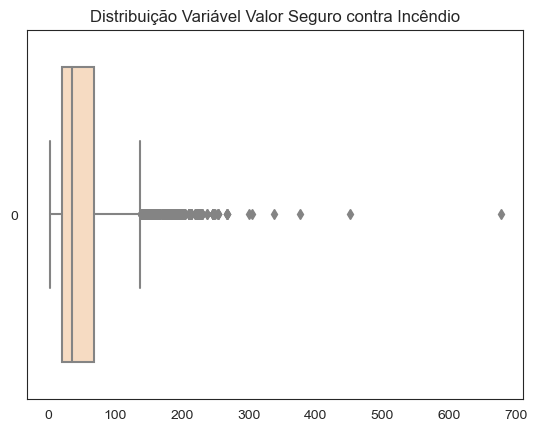

In [61]:
plt4 = sns.boxplot(df['fire_insurance'], orient="h", color="peachpuff")
plt4.ticklabel_format(style='plain', axis='x')
plt4.set(title ='Distribuição Variável Valor Seguro contra Incêndio')

Qual será o impacto do seguro contra incêndio no custo total? A hipótese é que, de todos os componentes, é o que tem menos impacto. Vamos partir da base sem os outliers de IPTU e taxa de condomínio, porque eles claramente impactam a análise de participação dos componentes no custo. O imóvel com maior impacto do seguro no custo total admite uma porcentagem de 1,83% deste componente do custo. Olhando por cidade, Porto Alegre parece admitir uma concentração de imóveis com maiores pesos do seguro no custo total.

In [62]:
df_seguro = df.loc[(df['property_tax'] < 20000) | (df['hoa'] < 2840)]
df_seguro['part_seguro'] = df_seguro['fire_insurance']/df_seguro['total']
df_seguro['part_seguro'].describe()

count    10691.000000
mean         0.010476
std          0.002635
min          0.000034
25%          0.008821
50%          0.010090
75%          0.012216
max          0.018325
Name: part_seguro, dtype: float64

[Text(0.5, 0, 'Cidade'),
 Text(0, 0.5, 'Participação Seguro no Custo Total'),
 Text(0.5, 1.0, 'Part. Custo com Seguro Contra Incêndio')]

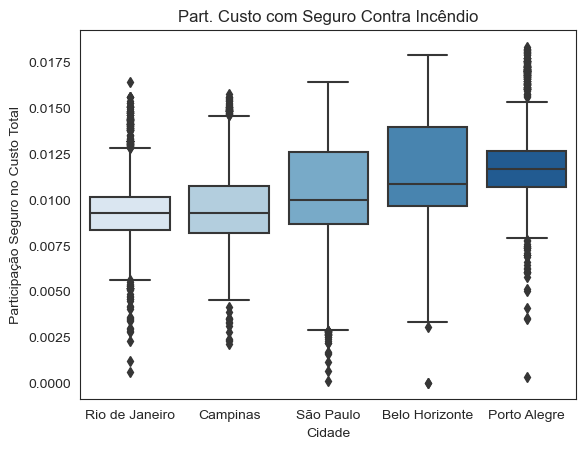

In [63]:
median_seguro_city = df_seguro.groupby(['city'])['part_seguro'].median().sort_values(ascending=True)

img_seguro = sns.boxplot(x=df_seguro["city"], y=df_seguro["part_seguro"], palette="Blues", order=median_seguro_city.index)
img_seguro.set(xlabel = "Cidade", ylabel = "Participação Seguro no Custo Total",title ='Part. Custo com Seguro Contra Incêndio')

## 4.11. Total

Por ser um composição (somatório) dos campos de HOA, Rent Amount, Property Tax e Fire Insurance, a distribuição do custo total será afetada pela distribuição das variáveis que o compõe. Por exemplo, vimos que existem valores discrepantes para as variáveis de Property Tax e HOA. Como consequência, o boxplot da variável de custo total irá refletir isso.

Vemos que 75% dos imóveis possuem aluguel igual ou inferior a 6768,00. Claramente temos outliers, o que afeta, inclusive, o desvio-padrão (neste caso, é o valor altíssimo de 16485,49) e a média (ela é superior à mediana em mais ou menos 2000 reais). Ou seja, temos que tratar os outliers no componente do custo para ter uma ideia da sua distribuição.

In [64]:
df['total'].describe().apply("{0:.2f}".format)

count      10691.00
mean        5490.67
std        16485.49
min          499.00
25%         2061.50
50%         3582.00
75%         6768.00
max      1120000.00
Name: total, dtype: object

[Text(0.5, 1.0, 'Distribuição Variável Custo Total')]

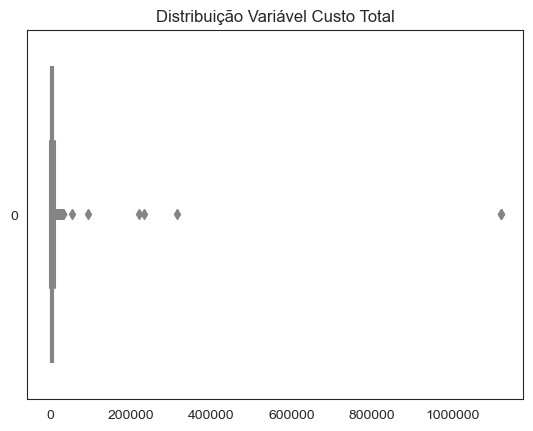

In [65]:
plt5 = sns.boxplot(df['total'], orient="h", color="peachpuff")
plt5.ticklabel_format(style='plain', axis='x')
plt5.set(title ='Distribuição Variável Custo Total')

# 5. Análise dos valores do aluguel

Sabemos que a decisão de onde morar depende da análise do custo total com a moradia. Porém, o componente que mais pesa no valor total é o aluguel (conforme análise abaixo). Logo, faz mais sentido iniciar a análise por ele.

Pela análise do histograma e pelas estatísticas descritivas, vemos que a variável de participação do valor do aluguel no valor total possui média de 0,76 e mediana de 0,76. Além disso, vemos que mais de 75% das observações possuem valor maior do que 67,47%. Ou seja, para a maior parte dos imóveis, o aluguel é o fator de maior peso no custo total.

In [66]:
df['part_rent'] = df['rent_amount']/df['total']

In [67]:
media_part_rent = df['part_rent'].mean()
mediana_part_rent = df['part_rent'].median()
print(media_part_rent, mediana_part_rent)

0.7604466192327923 0.7635232168501676


In [68]:
df['part_rent'].describe()

count    10691.000000
mean         0.760447
std          0.137959
min          0.002491
25%          0.674724
50%          0.763523
75%          0.860080
max          0.995450
Name: part_rent, dtype: float64

In [69]:
fig1 = px.histogram(df, 
            x='part_rent',
            marginal='box',
            histnorm='probability',
            color_discrete_sequence=['royalblue'],
            labels={"part_rent": "Parcela do aluguel no custo total"})
fig1.update_layout(template='plotly_white',
                   plot_bgcolor='rgba(0, 0, 0, 0)')
fig1.add_vline(x=media_part_rent, line_color="black")
fig1.add_vline(x=mediana_part_rent, line_color="red")

## 5.1. Por cidade

Em um primeiro momento, vamos analisar comparativamente as cidades em um mesmo gráfico. Por premsisa, estamos ordenando as caixas de acordo com a ordem crescente das medianas dos valores de aluguel por cidade. 

Desta forma, as cidades já aparecem ordenadas no eixo X, o que deixa claro duas questões: (i) São Paulo é a cidade que possui maior mediana no valor do aluguel (indícios de ser a cidade com aluguel mais caro do país na nossa amostra) e (ii) é a cidade que, na nossa amostra, possui os imóveis com maiores valores de aluguel. Ainda dentro da segunda questão, provavelmente são os outliers de São Paulo que tornam a visualização das informações pouco legível. Isto é, precisamos de mais alguma manipulação para gerar um insight mais legível e confiável.

A média do aluguel em São Paulo é de 4652,80, contra 3664,97 de Belo Horizonte, 3232,90 do Rio de Janeiro, 2364,29 de Campinas e 2337,70 de Porto Alegre. Quando avaliamos a mediana, temos 3400 em São Paulo, 2300,00 no Rio de Janeiro e em Minas Gerais, 1650,00 em Porto Alegre e 1500,00 em Campinas. Avaliando o valor máximo, vemos a discrepância: o valor máximo da nossa amostra é de 45.000,00 e o imóvel está em São Paulo. Porto Alegre admitiu um valor máximo de 19.000,00. Pelo gráfico vemos que há mais de um valor entre 19.000 e 45.000 só para a cidade de São Paulo.

In [70]:
median_rent_city = df.groupby(['city'])['rent_amount'].median().sort_values(ascending=True)

Média: city
Belo Horizonte    3664.974543
Campinas          2364.290739
Porto Alegre      2337.699916
Rio de Janeiro    3232.904064
São Paulo         4652.793783
Name: rent_amount, dtype: float64
Mediana: city
Belo Horizonte    2300.0
Campinas          1500.0
Porto Alegre      1650.0
Rio de Janeiro    2300.0
São Paulo         3400.0
Name: rent_amount, dtype: float64
Máximo: city
Belo Horizonte    15000
Campinas          15000
Porto Alegre      19000
Rio de Janeiro    15000
São Paulo         45000
Name: rent_amount, dtype: int64


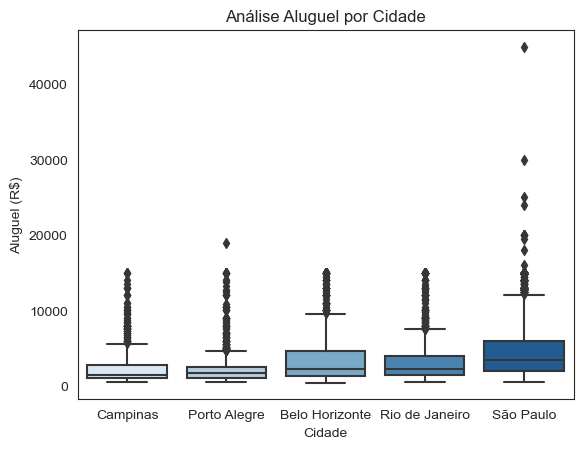

In [71]:
fig2 = sns.boxplot(x=df["city"], y=df["rent_amount"], palette="Blues", order=median_rent_city.index)
fig2.set(xlabel = "Cidade", ylabel = "Aluguel (R$)",title ='Análise Aluguel por Cidade')
print("Média:", df.groupby("city")["rent_amount"].mean())
print("Mediana:", df.groupby("city")["rent_amount"].median())
print("Máximo:", df.groupby("city")["rent_amount"].max())

As perguntas que surgem são: (i) a média do aluguel em São Paulo é, de fato, maior do que as demais cidades? (ii) A média das demais cidades, com base em sua distribuição, são estatisticamente diferentes? Vamos responder a primeira pergunta por meio de um teste de hipóteses.

Qual cenário temos? Assumindo que a amostra de cada cidade é independente das demais, temos que realizar testes de hipóteses para médias, onde desconhecemos os desvios-padrão populacionais. 

In [72]:
df_sp = df.loc[df['city']=='São Paulo']
df_rj = df.loc[df['city']=='Rio de Janeiro']
df_bh = df.loc[df['city']=='Belo Horizonte']
df_pa = df.loc[df['city']=='Porto Alegre']
df_ca = df.loc[df['city']=='Campinas']

In [73]:
sp_aluguel = df_sp["rent_amount"]
bh_aluguel = df_bh["rent_amount"]
rj_aluguel = df_rj["rent_amount"]
pa_aluguel = df_pa["rent_amount"]
ca_aluguel = df_ca["rent_amount"]

In [74]:
import scipy.stats as stats

A hipótese nula para cada teste de hipótese para média é de que as médias são iguais. A hipótese alternativa é de que as médias são diferentes. Nossas amostras são maiores do que 30. Assim, podemos considerar, pelo teorema central do limite, que a média amostral tem distribuição aproximadamente normal (nos habilitando a utilizar o teste de hipóteses com base na estatística t). Por fim, fazemos uma suposição: assumimos que os desvios-padrão populacionais (que desconhecemos) são diferentes.

Na lista 'resultado_th_1' retornamos os 'p-valores' dos testes comparando a média de SP com a média das demais cidades. Estabalecendo um nível de significância de 5%, vemos que todos os p-valores são menores do que 0,05. Logo, rejeitamos a hipótese nula de que a média do aluguel na cidade de São Paulo é igual à média das demais cidades. Isto é, podemos afirmar a média do aluguel em São Paulo é estatisticamente diferente das demais cidades. Este resultado prova o que vemos pela comparação entre boxplot's.

In [75]:
th_bh = stats.ttest_ind(a=sp_aluguel, b=bh_aluguel, equal_var=False) 
th_rj = stats.ttest_ind(a=sp_aluguel, b=rj_aluguel, equal_var=False) 
th_pa = stats.ttest_ind(a=sp_aluguel, b=pa_aluguel, equal_var=False) 
th_ca = stats.ttest_ind(a=sp_aluguel, b=ca_aluguel, equal_var=False) 

In [76]:
resultado_th_1 = [th_bh[1], th_rj[1], th_pa[1], th_ca[1]]
print(resultado_th_1)

[4.061213450935936e-19, 5.5154354921048894e-58, 6.985374502400197e-163, 1.1237754778469664e-114]


## 5.2. Por tipo de mobília

Vendo pelo boxplot, observamos que para imóveis não mobiliados, a dispersão dos valores de aluguel é maior. Apesar de a mediana do aluguel para móveis mobiliados ser maior (3500,00 vs. 2400,00), assim como a média (4882,29 vs. 3578,58), um teste de hipótese para médias de duas amostras é uma avaliação importante a ser feita.

Média: furniture
furnished        4882.287030
not furnished    3578.581942
Name: rent_amount, dtype: float64
Mediana: furniture
furnished        3500.0
not furnished    2400.0
Name: rent_amount, dtype: float64
Máximo: furniture
furnished        20000
not furnished    45000
Name: rent_amount, dtype: int64
Frequência: furniture
furnished        2606
not furnished    8085
Name: rent_amount, dtype: int64


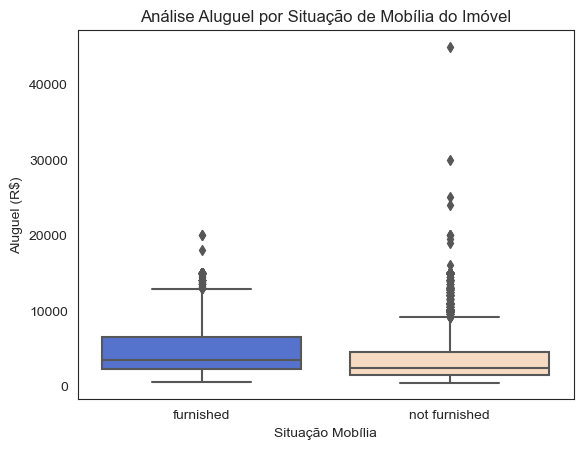

In [77]:
fig3 = sns.boxplot(x=df["furniture"], y=df["rent_amount"], palette=my_palette)
fig3.set(xlabel = "Situação Mobília", ylabel = "Aluguel (R$)",title ='Análise Aluguel por Situação de Mobília do Imóvel')
print("Média:", df.groupby("furniture")["rent_amount"].mean())
print("Mediana:", df.groupby("furniture")["rent_amount"].median())
print("Máximo:", df.groupby("furniture")["rent_amount"].max())
print("Frequência:", df.groupby("furniture")["rent_amount"].count())

A amostra é superior a 30, logo também podemos considerar que as médias são normalmente distribuídas, habilitando a realização do teste de hipóteses. Assumimos também que dos desvios-padrão desconhecidos (da distribuição do valor do aluguel por situação da mobília) são diferentes para realização do teste.

Assumindo um nível de significância de 5%, como o p-valor é inferior a 0,05, rejeitamos a hipótese nula (de que a média do valor do aluguel é igual para imóveis mobiliados e não-mobiliados). Assim, vemos que o fato de o imóvel ser mobiliado aumenta com significância estatística o valor do aluguel. 

Além disso, vale a pena mencionar que a amostra possui uma maior quantidade de imóveis não mobiliados. De 10691 imóveis, 8085 são mobiliados (75,62%) e 2606 não são mobiliados (24,38%). Ou seja, a cada 4 imóveis, 1 é mobiliado. Em suma, ser mobiliado é uma prática relativamente menos observável e tende a aumentar o valor do aluguel nos imóveis.

In [78]:
df_furnished = df.loc[df['furniture']=='furnished']
df_not_furnished = df.loc[df['furniture']=='not furnished']

furnished_aluguel = df_furnished["rent_amount"]
not_furnished_aluguel = df_not_furnished["rent_amount"]

stats.ttest_ind(a=furnished_aluguel, b=not_furnished_aluguel, equal_var=False) 

TtestResult(statistic=16.41875560395071, pvalue=1.0184449136730463e-58, df=4093.8133672429854)

## 5.3. Aceitação de animais

Pelo boxplot observamos que a dispersão dos valores de aluguel parece ser maior para imóveis que aceitam pets. Porém, pouco pode se tirar sobre o impacto de 'aceitar ou não' pets sobre o valor do aluguel. A média (mediana) do aluguel para imóveis que aceitam pets é 4019,86 (2792,00) contra 3464,21 (2385,00) dos imóveis que não aceitam. Novamente, vamos recorrer ao teste de hipóteses para tirar alguma conclusão desta análise.

Média: animal
acept        4019.856524
not acept    3464.212121
Name: rent_amount, dtype: float64
Mediana: animal
acept        2792.0
not acept    2385.0
Name: rent_amount, dtype: float64
Máximo: animal
acept        45000
not acept    20000
Name: rent_amount, dtype: int64


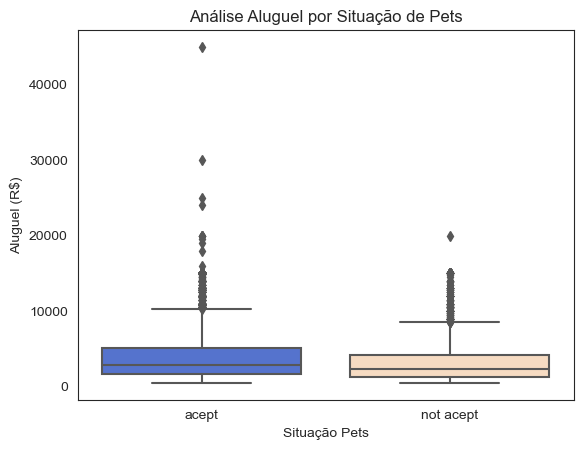

In [79]:
fig4 = sns.boxplot(x=df["animal"], y=df["rent_amount"], palette=my_palette)
fig4.set(xlabel = "Situação Pets", ylabel = "Aluguel (R$)",title ='Análise Aluguel por Situação de Pets')
print("Média:", df.groupby("animal")["rent_amount"].mean())
print("Mediana:", df.groupby("animal")["rent_amount"].median())
print("Máximo:", df.groupby("animal")["rent_amount"].max())

Assumimos as mesmas premissas dos testes anteriores. Rejeitamos a hipótese nula de que a média do aluguel dos dois grupos são iguais. Desta forma, o fato de aceitar pets tende a elevar o valor do aluguel.

In [80]:
df_accept = df.loc[df['animal']=='acept']
df_not_accept = df.loc[df['animal']=='not acept']

accept_aluguel = df_accept["rent_amount"]
not_accept_aluguel = df_not_accept["rent_amount"]

stats.ttest_ind(a=accept_aluguel, b=not_accept_aluguel, equal_var=False) 

TtestResult(statistic=7.42876001938293, pvalue=1.3216080889833354e-13, df=4181.634924348427)

## 5.4. Por número de vagas de garagem

Apesar de ser uma variável com mais de dez obervações distintas, interpretamos 'parking spaces' como se fossem, na verdade, 13 categorias distintas. Não é uma variável contínua, de forma a justificar a utilização de um gráfico de dispersão. A amostra para cada quantidade de vagas de garagem pode admitir vários valores de aluguel. É o que observamos com o Boxplot abaixo. De 0 até 7 vagas de garagem, vemos que a média e a mediana do aluguel crescem, evidenciando que quanto maior o número de vagas de garagem mais caro será o aluguel cobrado. 

Média: parking_space
0     2140.854268
1     2602.666116
2     4526.169164
3     6430.960744
4     7752.551331
5     8278.117391
6     8867.846626
7     9486.363636
8     8704.325203
10    8950.000000
12    6900.000000
Name: rent_amount, dtype: float64
Mediana: parking_space
0     1585.0
1     2000.0
2     3500.0
3     5500.0
4     7000.0
5     7620.0
6     8499.0
7     9300.0
8     8000.0
10    8950.0
12    6900.0
Name: rent_amount, dtype: float64
Frequência: parking_space
0     2683
1     3630
2     2069
3      968
4      789
5      230
6      163
7       33
8      123
10       2
12       1
Name: rent_amount, dtype: int64


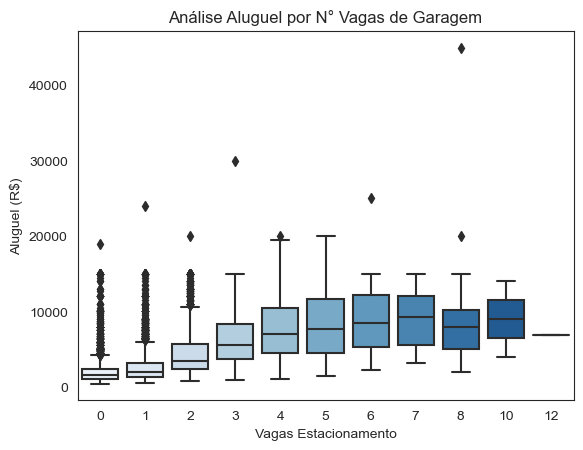

In [81]:
fig5 = sns.boxplot(x=df["parking_space"], y=df["rent_amount"], palette='Blues')
fig5.set(xlabel = "Vagas Estacionamento", ylabel = "Aluguel (R$)",title ='Análise Aluguel por N° Vagas de Garagem')
print("Média:", df.groupby("parking_space")["rent_amount"].mean())
print("Mediana:", df.groupby("parking_space")["rent_amount"].median())
print("Frequência:", df.groupby("parking_space")["rent_amount"].count())

Além disso, pelo Boxplot e pelas informações da quantidade de imóveis por quantidade de vagas de garagem, vemos que temos 3 imóveis com 10 ou mais vagas (o fato de termos um imóvel com 12 vagas de garagem). Pelo critério que definimos no início da análise, vemos que estas três observações são casas (coluna 'type'). Pelo boxplot, vemos que casas admitem mais vagas de garagem. Apartamentos com mais de 4 vagas de garagem tendem a ser minoria dentro da distribuição da amostra de apartamentos. Esta análise é importante para contextualizar valores de vagas de garagem altos na nossa amostra, uma vez que pode causar estranheza.

In [82]:
df.loc[df['parking_space']>=10]

city  area  rooms  bathroom  parking_space  floor animal  \
3559  São Paulo  1100      4         6             10      0  acept   
4813  São Paulo  1600      4         5             12      0  acept   
5445  São Paulo   190      1         2             10      0  acept   

          furniture   hoa  rent_amount  property_tax  fire_insurance  total  \
3559  not furnished  3000        14000          2000             211  19210   
4813  not furnished     1         6900          5000             104  12010   
5445  not furnished     0         3900            34              59   3993   

      animal_bool  furniture_bool  apartment   type  part_condom  part_iptu  \
3559         True           False      False  House     0.156169   0.104112   
4813         True           False      False  House     0.000083   0.416320   
5445         True           False      False  House     0.000000   0.008515   

      part_rent  
3559   0.728787  
4813   0.574521  
5445   0.976709

[Text(0.5, 0, 'Tipo'),
 Text(0, 0.5, 'Vagas Estacionamento'),
 Text(0.5, 1.0, 'Vagas de Garagem por Tipo de Imóvel')]

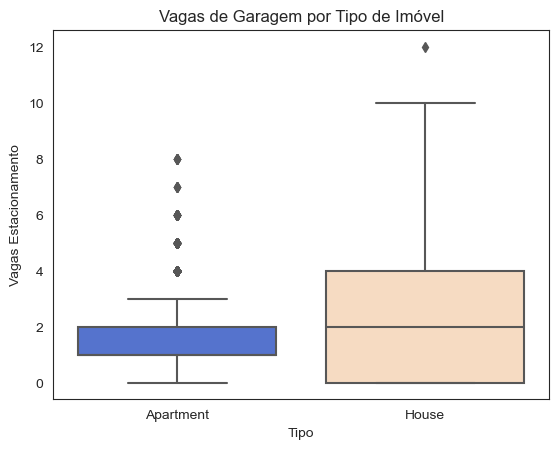

In [83]:
fig6 = sns.boxplot(x=df["type"], y=df["parking_space"], palette=my_palette)
fig6.set(xlabel = "Tipo", ylabel = "Vagas Estacionamento", title ='Vagas de Garagem por Tipo de Imóvel')

Com a análise do gráfico e da tabela a seguir, vemos que, a partir de 5 vagas de garagem, passamos a observar mais casas do que apartamentos. Vemos que a tendência de crescimento do valor do aluguel ainda é interrompida em ambos os casos na categoria de imóveis com 8 vagas de garagem. 

Com esta nova análise, podemos entender que se a pessoa está procurando mais vagas de garagem, ela tem que estar disposta a pagar mais pelo aluguel, além de também estar mais propensa a se mudar para casas, pois encontrará cada vez menos apartamentos.

[Text(0.5, 0, 'Vagas Estacionamento'),
 Text(0, 0.5, 'Aluguel (R$)'),
 Text(0.5, 1.0, 'Análise Aluguel por N° Vagas de Garagem')]

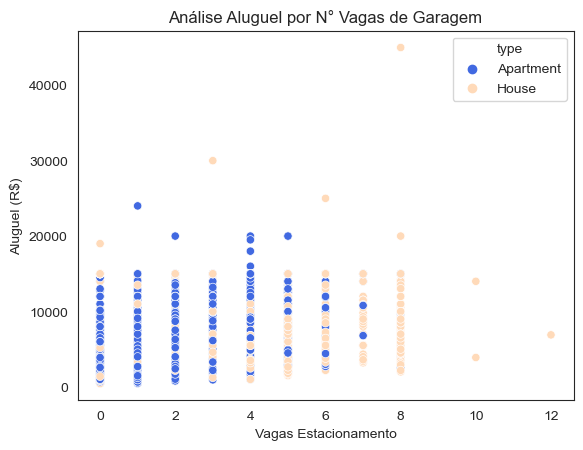

In [84]:
fig7 = sns.scatterplot(x=df["parking_space"], y=df["rent_amount"], hue=df["type"], palette=my_palette)
fig7.set(xlabel = "Vagas Estacionamento", ylabel = "Aluguel (R$)", title ='Análise Aluguel por N° Vagas de Garagem')

In [85]:
df.groupby(['parking_space', 'type']).agg({'type':'count', 'rent_amount':'mean'})

type   rent_amount
parking_space type                         
0             Apartment  2045   2114.783863
              House       638   2224.418495
1             Apartment  3291   2586.663020
              House       339   2758.023599
2             Apartment  1587   4416.212980
              House       482   4888.203320
3             Apartment   689   6359.120464
              House       279   6608.372760
4             Apartment   465   8265.094624
              House       324   7016.956790
5             Apartment   102   9098.225490
              House       128   7624.593750
6             Apartment    39   9389.461538
              House       124   8703.790323
7             Apartment     5  12320.000000
              House        28   8980.357143
8             Apartment     7   8090.714286
              House       116   8741.353448
10            House         2   8950.000000
12            House         1   6900.000000

## 5.5. Por número de andares

Em nossa análise separamos os imóveis entre casas e apartamentos a partir da especificação do número de andares: se não foi reportado o número de andares (observações com '-'), definimos o imóvel como casa; caso contrário, definimos como apartamento. Faz-se necessário, primeiro, entender a diferente de preços de aluguel entre casa e apartamento e, depois, ver se com o número de andares no prédio (análise somente para apartamentos) há aumento do valor do aluguel.

Na nossa amostra, temos mais apartamentos (8230, 76,98%) do que casas (2461, 23,02%). Vemos que a média e a mediana do valor de aluguel é significamente maior para casas do que para apartamentos: a mediana do valor do aluguel para casas é 3700,00 contra 2500,00 para apartamentos. Vemos que existem uma quantidade boa de apartamentos com aluguel acima de 100000,00. Entretanto, dada a distribuição dos valores nesta categoria, vemos que, ainda assim, a maior parte dos valores de aluguel para apartamento são menores ou iguais a 4407,50 (este é o valor do terceiro quartil). 

Como o foco aqui é a quantidade de andares (além de que a diferença de média/mediana entre grupos é bem maior), vamos abdicar de realizar o teste de hipóteses. 

Média: type
Apartment    3582.395747
House        4946.346201
Name: rent_amount, dtype: float64
Mediana: type
Apartment    2500.0
House        3700.0
Name: rent_amount, dtype: float64
Frequência: type
Apartment    8230
House        2461
Name: rent_amount, dtype: int64
75º percentil/Q3: type
Apartment    4407.5
House        7000.0
Name: rent_amount, dtype: float64


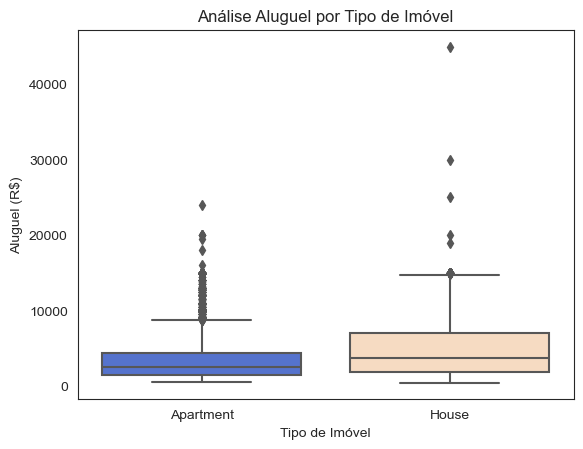

In [86]:
fig8 = sns.boxplot(x=df["type"], y=df["rent_amount"], palette=my_palette)
fig8.set(xlabel = "Tipo de Imóvel", ylabel = "Aluguel (R$)",title ='Análise Aluguel por Tipo de Imóvel')
print("Média:", df.groupby("type")["rent_amount"].mean())
print("Mediana:", df.groupby("type")["rent_amount"].median())
print("Frequência:", df.groupby("type")["rent_amount"].count())
print("75º percentil/Q3:", df.groupby("type")["rent_amount"].quantile(.75))

Analisando somente os apartamentos, temos, a priori, o Boxplot abaixo. Vemos que a partir de 16-18 andares o comportamento das caixas começa a ficar mais "errático". Isso pode ser muito em função da quantidade de observações existentes nessas categorias. Pelas informações de distribuição acumulada (segundo gráfico abaixo + tabela em sequência), vemos que apartamentos até 14 andares são aproximadamente 90% da amostra. Até apartamentos com 14 andares, vemos que há uma tendência de crescimento da mediana.

Todavia, esta análise descritiva inicial não é completa. Vemos que existem muitos valores discrepantes na distribuição do aluguel para apartamentos com menos andares. Outras variáveis podem explicar esses valores. Logo, há um indicativo para uma análise multivariável mais profunda: dentro de uma amostra de apartamentos que estão em prédios com a mesma quantidade de andares, o que explica a variabilidade dos valores de aluguel?

[Text(0.5, 0, 'Número de Andares'),
 Text(0, 0.5, 'Aluguel (R$)'),
 Text(0.5, 1.0, 'Análise Aluguel por N° Andares')]

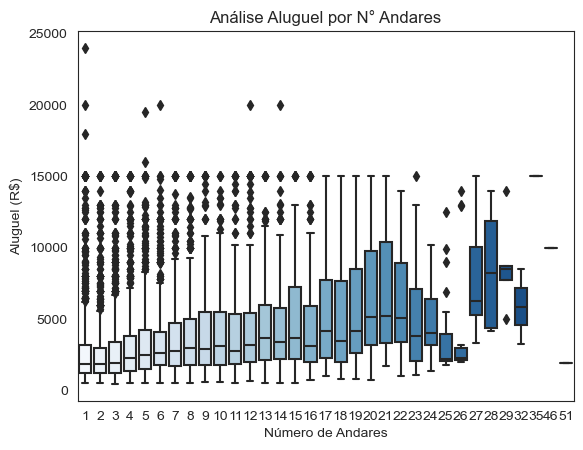

In [87]:
df_apto = df.loc[df['type']=='Apartment']

fig9 = sns.boxplot(x=df_apto["floor"], y=df_apto["rent_amount"], palette='Blues')
fig9.set(xlabel = "Número de Andares", ylabel = "Aluguel (R$)",title ='Análise Aluguel por N° Andares')

In [88]:
df_apto_amostra = df_apto.groupby(['floor']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)
df_apto_amostra['amostra_acumulada'] = df_apto_amostra['counts'].cumsum()
df_apto_amostra['percentual_amostra'] = (df_apto_amostra['amostra_acumulada']/8230)*100

[Text(0.5, 0, 'Número de Andares'),
 Text(0, 0.5, '% Acumulado da Amostra'),
 Text(0.5, 1.0, 'Distribuição Acumulada da Amostra por Andares')]

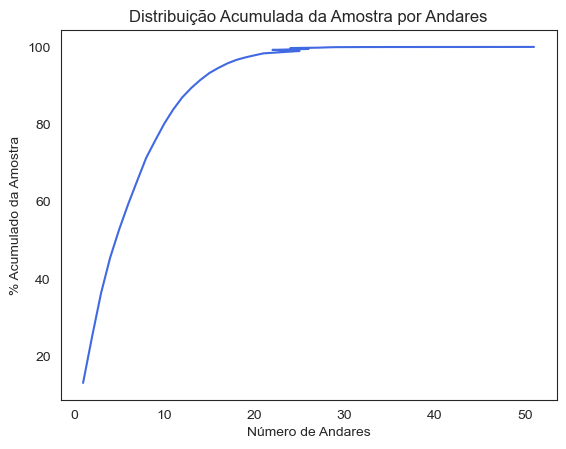

In [89]:
fig10 = df_apto_amostra.plot(x='floor', y='percentual_amostra', kind='line', legend=False, color='royalblue')
fig10.set(xlabel = "Número de Andares", ylabel = "% Acumulado da Amostra",title ='Distribuição Acumulada da Amostra por Andares')

In [90]:
df_apto_amostra

floor  counts  amostra_acumulada  percentual_amostra
0       1    1081               1081           13.134872
1       2     985               2066           25.103281
2       3     931               2997           36.415553
3       4     748               3745           45.504253
4       5     600               4345           52.794654
5       6     539               4884           59.343864
6       7     497               5381           65.382746
7       8     490               5871           71.336574
8       9     369               6240           75.820170
9      10     357               6597           80.157959
10     11     303               6900           83.839611
11     12     257               7157           86.962333
12     13     200               7357           89.392467
13     14     170               7527           91.458080
14     15     147               7674           93.244228
15     16     109               7783           94.568651
16     17      96               7879           95.735115
17     18      75               7954           96.646416
18     19      53               8007           97.290401
19     20      44               8051           97.825030
20     21      42               8093           98.335358
22     23      25               8118           98.639125
24     25      25               8143           98.942892
21     22      24               8167           99.234508
25     26      20               8187           99.477521
23     24      19               8206           99.708384
26     27       8               8214           99.805589
27     28       6               8220           99.878493
28     29       5               8225           99.939247
29     32       2               8227           99.963548
30     35       1               8228           99.975699
31     46       1               8229           99.987849
32     51       1               8230          100.000000

## 5.6. Por número de banheiros

No caso dos banheiros, a relação é mais explícita, apesar de termos o problema de poucos dados nas categorias mais altas, o que prejudica a análise da distribuição dos valores de aluguel. Todavia, fica claro que, pelo menos até 8 banheiros (já que imóveis com 9 ou 10 banheiros parecem ser ainda mais raros), quanto maior a quantidade de banheiros no imóvel, mais caro é o aluguel. Sendo assim, se alguém procura por um imóvel com maior quantidade de banheiros deve estar preparado para pagar mais de aluguel. Calculando o índice de correlação de Pearson (assumindo relação linear entre as variáveis), temos um valor de 0,67 (que é estatisticamente significativo, tendo em vista o p-valor abaixo de 0,05), que indica uma correlação positiva forte.

Observação 1: preferimos a visualização via Boxplot ao invés da visualização do Scatter Plot (gráfico de dispersão), pois reconhemos que há forte variabilidade dos dados para uma mesma categoria de quantidade de banheiros, o que poderia deixar o gráfico de dispersão pouco legível, apesar de este ser mais indicado para análise de correlação entre variáveis numéricas. Neste caso, temos uma variável numérica contínua (aluguel) contra uma variável numérica discreta (quantidade de banheiros), o que reforça o argumento a favor do Boxplot. Logo, com o Boxplot, conseguimos comparar a evolução das medianas e, ainda, avaliar a dispersão das informações, o que pode evidenciar a necessidade de análises mulrivariáveis.

Observação 2: o teste de hipótese para o índice de correlação de Pearson (p), tem como hipótese nula que p = 0. A estatística de teste é descrita pela imagem abaixo. Assumimos um teste bicaudal (hipótese alternativa é p <> 0) e um nível de significância de 5%. 

<img src="Teste de Hipóteses.jpg" width = 500>

Média: bathroom
1      1857.408510
2      3371.483328
3      5410.198100
4      7186.502250
5      8367.586505
6      9156.613953
7     10370.047059
8     12447.272727
9     10092.250000
10    12333.333333
Name: rent_amount, dtype: float64
Mediana: bathroom
1      1500.0
2      2700.0
3      4300.0
4      6500.0
5      8000.0
6      8500.0
7      9250.0
8     13200.0
9      8519.5
10    15000.0
Name: rent_amount, dtype: float64
Frequência: bathroom
1     4301
2     2909
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: rent_amount, dtype: int64


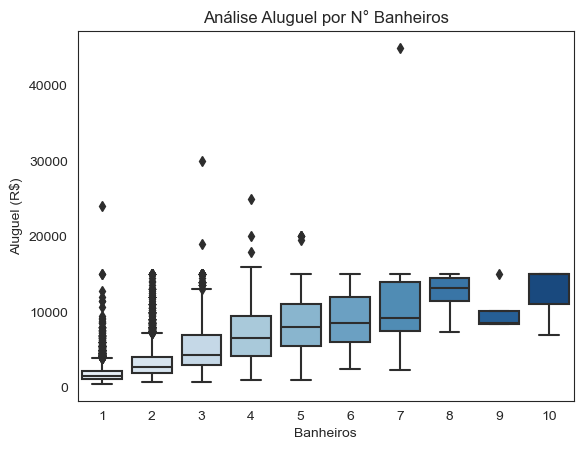

In [91]:
fig11 = sns.boxplot(x=df["bathroom"], y=df["rent_amount"], palette='Blues')
fig11.set(xlabel = "Banheiros", ylabel = "Aluguel (R$)",title ='Análise Aluguel por N° Banheiros')
print("Média:", df.groupby("bathroom")["rent_amount"].mean())
print("Mediana:", df.groupby("bathroom")["rent_amount"].median())
print("Frequência:", df.groupby("bathroom")["rent_amount"].count())

In [92]:
from scipy.stats import pearsonr
pearsonr(df["bathroom"], df["rent_amount"])

PearsonRResult(statistic=0.6685037875151953, pvalue=0.0)

## 5.7. Por número de quartos

Semelhante à análise de Valor do Aluguel vs. Número de Banheiros, temos a análise da correlação entre Número de Quartos e Valor do Aluguel. A premissa do mundo real é a mesma: quanto maior a quantidade de cômodos no imóvel, mais alto é o aluguel cobrado. Pelo Boxplot, vemos uma tendência aumento da média e mediana na medida em que o número de quartos. O índice de correlação de Pearson, apesar de menor (0,54), continua indicando correlação forte (costuma ocorrer a partir da faixa de 0,5-0,6) e estatisticamente significativa.

Média: rooms
1      2027.854931
2      2462.187227
3      4482.855569
4      7155.170240
5      8227.239583
6      7466.397059
7      8865.277778
8      9872.727273
9     12000.000000
10     8243.333333
13    15000.000000
Name: rent_amount, dtype: float64
Mediana: rooms
1      1600.0
2      1800.0
3      3465.0
4      6200.0
5      8000.0
6      7100.0
7      8550.0
8      8000.0
9     12000.0
10     8330.0
13    15000.0
Name: rent_amount, dtype: float64
Frequência: rooms
1     2454
2     2975
3     3268
4     1586
5      288
6       68
7       36
8       11
9        1
10       3
13       1
Name: rent_amount, dtype: int64


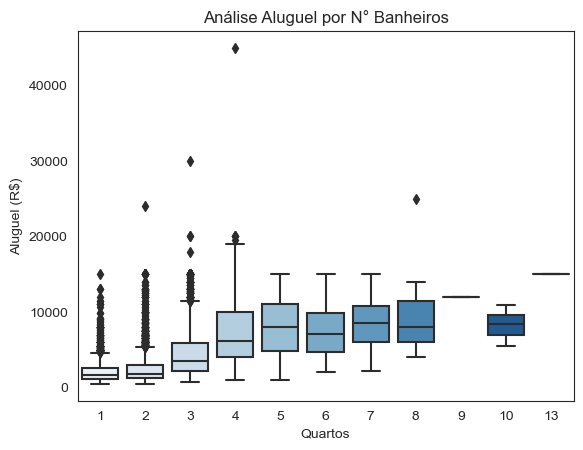

In [93]:
fig12 = sns.boxplot(x=df["rooms"], y=df["rent_amount"], palette='Blues')
fig12.set(xlabel = "Quartos", ylabel = "Aluguel (R$)",title ='Análise Aluguel por N° Banheiros')
print("Média:", df.groupby("rooms")["rent_amount"].mean())
print("Mediana:", df.groupby("rooms")["rent_amount"].median())
print("Frequência:", df.groupby("rooms")["rent_amount"].count())

In [94]:
pearsonr(df["rooms"], df["rent_amount"])

PearsonRResult(statistic=0.5417807783298825, pvalue=0.0)

## 5.8. Área

No primeiro gráfico abaixo vemos o que os outliers de área fazem com o gráfico de dispersão fique pouco legível. Anteriormente, fizemos uma análise prévia para indicar, a priori, o fato de valores de área acima de 10000 serem potenciais outliers. Iremos, somente para fins de análise complementar, retirar esses pontos e ver o impacto sobre o gráfico de dispersão e sobre o índice de correlação de Pearson. Vale ressaltar que não é definitiva esta exclusão, pois, apesar de os valores serem discrepantes, ainda temos que confirmar que eles de fato se configuram como outliers.

[Text(0.5, 0, 'Área (m²)'),
 Text(0, 0.5, 'Aluguel (R$)'),
 Text(0.5, 1.0, 'Aluguel vs. Área')]

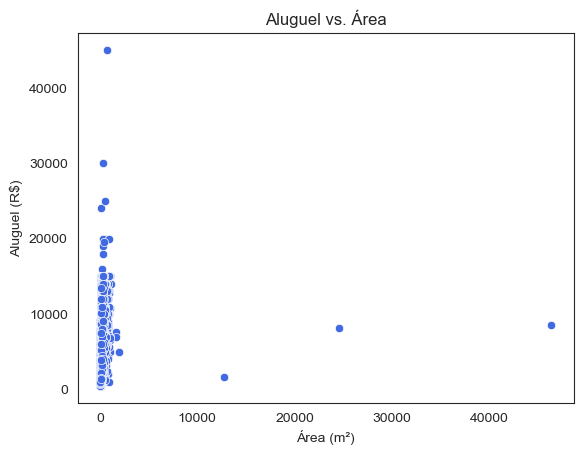

In [95]:
fig12 = sns.scatterplot(x=df["area"], y=df["rent_amount"], color='royalblue')
fig12.set(xlabel = "Área (m²)", ylabel = "Aluguel (R$)", title ='Aluguel vs. Área')

In [96]:
df_area = df.loc[df['area']<=10000]

[Text(0.5, 0, 'Área (m²)'),
 Text(0, 0.5, 'Aluguel (R$)'),
 Text(0.5, 1.0, 'Aluguel vs. Área')]

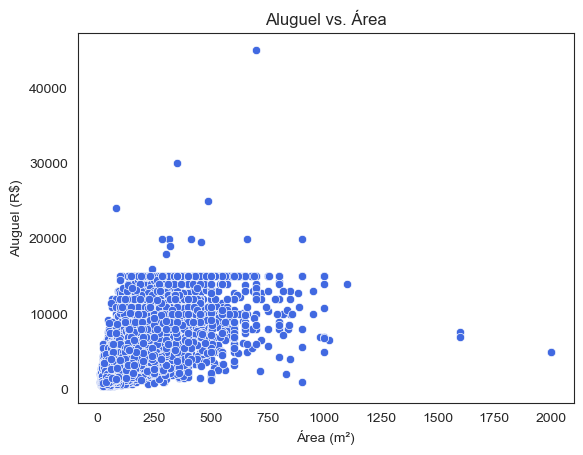

In [97]:
fig13 = sns.scatterplot(x=df_area["area"], y=df_area["rent_amount"], color='royalblue')
fig13.set(xlabel = "Área (m²)", ylabel = "Aluguel (R$)", title ='Aluguel vs. Área')

In [98]:
corr_alu_area_1 = pearsonr(df["area"], df["rent_amount"])
corr_alu_area_2 = pearsonr(df_area["area"], df_area["rent_amount"])

In [99]:
comparação_corr = [corr_alu_area_1[0], corr_alu_area_2[0]]
comparação_corr

[0.18073910825371353, 0.6641298060722964]

In [100]:
comparação_corr_pvalor = [corr_alu_area_1[1], corr_alu_area_2[1]]
comparação_corr_pvalor

[3.4758869757843645e-79, 0.0]

Primeiro, mesmo com a exclusão parcial dos valores discrepantes, vemos que existe uma concentração de pontos nos seguintes intervalos no plano cartesiano: Aluguel = (0,15000), Area = (0, 1000). Qualquer afirmação sobre uma correlação linear positiva seria insuficiente se fosse feita após avaliação do gráfico somente. 

Segundo, com a exclusão parcial, o índice de correlação salta de 0,18 (correlação fraca) para 0,66 (correlação forte). Se olharmos para o valor de aluguel dos valores discrepantes, temos valores abaixo de 10000,00 para imóveis com área maior do que 10000 m² (são todos apartamentos em prédios de, no mínimo, 3 andares; que apartamento é esse??). Há, portanto indícios de que, quanto maior a área do imóvel, maior o valor de aluguel a ser cobrado.

In [101]:
df.loc[df['area']>10000]

city   area  rooms  bathroom  parking_space  floor animal  \
2397  Belo Horizonte  46335      4         8              5     11  acept   
5915       São Paulo  24606      5         4              4     12  acept   
9241        Campinas  12732      3         2              0      3  acept   

          furniture   hoa  rent_amount  property_tax  fire_insurance  total  \
2397      furnished   960         8500           646             114  10220   
5915  not furnished  2254         8100          7859             103  18320   
9241  not furnished   700         1600            96              21   2417   

      animal_bool  furniture_bool  apartment       type  part_condom  \
2397         True            True       True  Apartment     0.093933   
5915         True           False       True  Apartment     0.123035   
9241         True           False       True  Apartment     0.289615   

      part_iptu  part_rent  
2397   0.063209   0.831703  
5915   0.428985   0.442140  
9241   0.039719   0.661978

# 6. Análise cômodos

## 6.1. Banheiros e quartos

O Boxplot abaixo indica que número de quartos e número de banheiros são duas grandezas diretamente proporcionais. O imóvel que possu a maior quantidade de quartos, também terá a maior quantidade de banheiros. Não é uma relação de causalidade. Se um imóvel é construído com um número de quartos para atender um número maior de pessoas, o número de banheiros tenderá a acompanhar. O valor de 0,73 para o índice de correlação só evidencia a significância desta relação.

[Text(0.5, 0, 'Número de Quartos'), Text(0, 0.5, 'Número de Banheiros')]

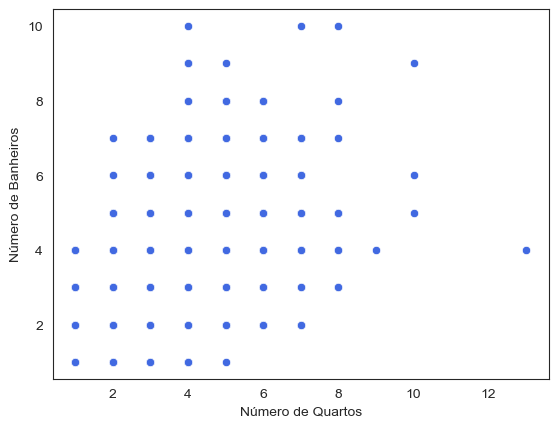

In [102]:
fig13 = sns.scatterplot(x=df["rooms"], y=df["bathroom"], color='royalblue')
fig13.set(xlabel = "Número de Quartos", ylabel = "Número de Banheiros")

In [103]:
pearsonr(df["rooms"], df["bathroom"])

PearsonRResult(statistic=0.7337772058511578, pvalue=0.0)

## 6.2. Banheiros, quartos e área

Por meio do gráfico abaixo, buscar correlacionar as três variáveis. Tinha-se, por hipótese, que quanto maior a quantidade de cômodos, maior a área do imóvel. Em termos gráficos, esperávamos que as maiores barras estivessem concentradas perto das coordenadas (X,Y) = (Quartos, Banheiros) = (14,10). Todavia, temos que os dois maiores valores de área da amostra possuem valores intermediários de quantidade de banheiros e quartos, prejudicando a inferência de alguma causalidade via análise gráfica. Além disso, temos que as variáveis de quartos e banheiros são numéricas discretas, admitindo menos de 15 categorias de valores, sendo que a variabilidade de variável contínua de área é muito maior. Ou seja, para uma mesma combinação de quantidade de quartos e banheiros, pode haver diversos valores de áreas. O gráfico ressalta o maior valor de área disponível. 

In [106]:
from mpl_toolkits import mplot3d 

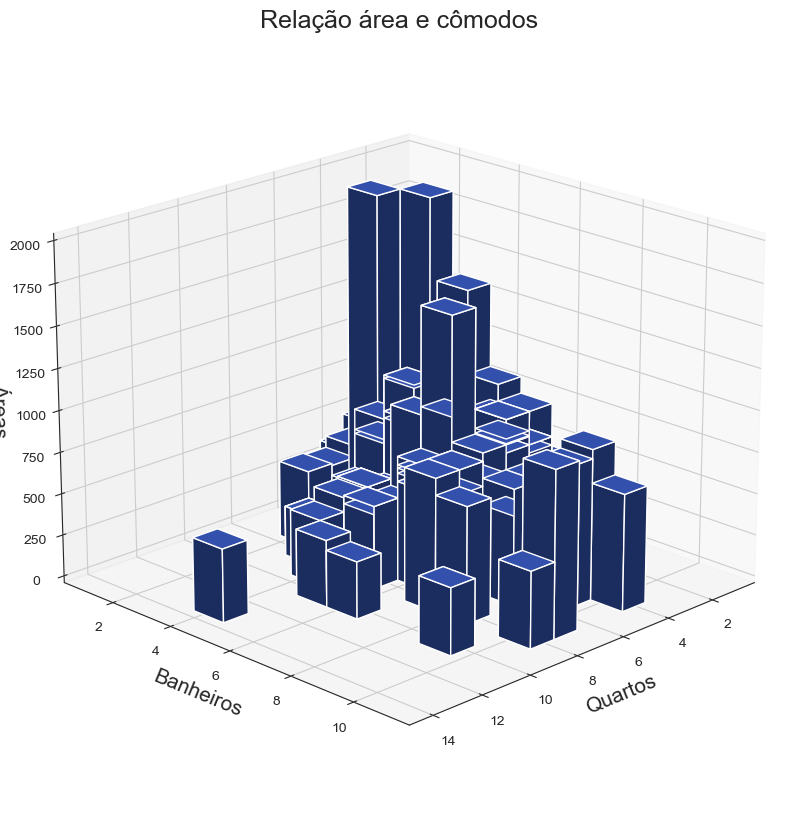

In [116]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
num_barras = 10688

x_pos = df_area["rooms"]
y_pos = df_area["bathroom"]
z_pos = [0] * num_barras

x_size = np.ones(num_barras)
y_size = np.ones(num_barras)
z_size = df_area["area"]

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='royalblue')
ax.set_title('Relação área e cômodos', fontsize=18);
ax.set_xlabel('Quartos', fontsize=15)
ax.set_ylabel('Banheiros', fontsize=15)
ax.set_zlabel('Áreas', fontsize=15)
ax.view_init(20, 45)
plt.show()

# 7. Análise final

Das variáveis categóricas, vimos que aceitar pets e ser mobiliado tende a aumentar o valor do aluguel. Consequentemente, podemos inferir que também impacta diretamente no custo total do imóvel. Vimos também que imóveis nas duas principais cidades do país - São Paulo e Rio de Janeiro - tendem a ser mais caros em termos de aluguel. Ou seja, a hipótese (a ser confirmada em análises multivariadas mais profundas) é de que imóveis mais caros tendem a se concentrar nessas cidades. Além disso, independente da cidade, imóveis mais caros tendem a ser mobiliados e tendem a permitir pets. 

Ampliando a análise das variáveis quantitativas (com exceção daquelas que representam o componente dos custos), vemos que área, quantidade de quartos, quantidade de banheiros e quantidade de vagas de garagem admitem uma correlação fraca. Sabemos que a quantidade de cômodos, banheiro e área (principalmente) impactam no valor do aluguel. Desta forma, uma análise mais profunda sobre o impacto dessas variáveis sobre os demais componentes mostra-se interessante. 

In [108]:
df_corr = df_seguro[df_seguro['area']<=10000]
df_corr = df_corr[["area", "rooms", "bathroom", "parking_space", "floor", "total"]]

In [109]:
corr_mat = df_corr.corr()
round(corr_mat,2)

area  rooms  bathroom  parking_space  floor  total
area           1.00   0.69      0.76           0.69  -0.11   0.19
rooms          0.69   1.00      0.73           0.62  -0.09   0.13
bathroom       0.76   0.73      1.00           0.70   0.01   0.21
parking_space  0.69   0.62      0.70           1.00  -0.03   0.15
floor         -0.11  -0.09      0.01          -0.03   1.00   0.04
total          0.19   0.13      0.21           0.15   0.04   1.00

<Axes: >

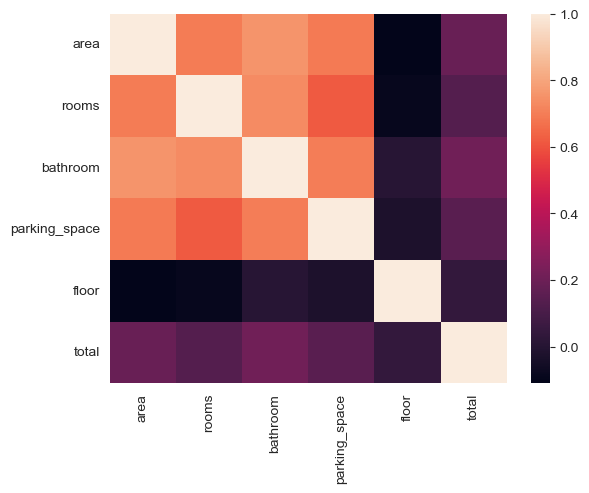

In [110]:
sns.heatmap(corr_mat)